<a href="https://colab.research.google.com/github/frankayra/IA-ANN/blob/main/TensorFlow_with_GPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tensorflow with GPU

This notebook provides an introduction to computing on a [GPU](https://cloud.google.com/gpu) in Colab. In this notebook you will connect to a GPU, and then run some basic TensorFlow operations on both the CPU and a GPU, observing the speedup provided by using the GPU.


## Enabling and testing the GPU

First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

TensorFlow 2.x selected.
Found GPU at: /device:GPU:0


## Observe TensorFlow speedup on GPU relative to CPU

This example constructs a typical convolutional neural network layer over a
random image and manually places the resulting ops on either the CPU or the GPU
to compare execution speed.

In [ ]:
import tensorflow as tf
import timeit

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  print(
      '\n\nThis error most likely means that this notebook is not '
      'configured to use a GPU.  Change this in Notebook Settings via the '
      'command palette (cmd/ctrl-shift-P) or the Edit menu.\n\n')
  raise SystemError('GPU device not found')

def cpu():
  with tf.device('/cpu:0'):
    random_image_cpu = tf.random.normal((100, 100, 100, 3))
    net_cpu = tf.keras.layers.Conv2D(32, 7)(random_image_cpu)
    return tf.math.reduce_sum(net_cpu)

def gpu():
  with tf.device('/device:GPU:0'):
    random_image_gpu = tf.random.normal((100, 100, 100, 3))
    net_gpu = tf.keras.layers.Conv2D(32, 7)(random_image_gpu)
    return tf.math.reduce_sum(net_gpu)
  
# We run each op once to warm up; see: https://stackoverflow.com/a/45067900
cpu()
gpu()

# Run the op several times.
print('Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images '
      '(batch x height x width x channel). Sum of ten runs.')
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)
print('GPU speedup over CPU: {}x'.format(int(cpu_time/gpu_time)))

Time (s) to convolve 32x7x7x3 filter over random 100x100x100x3 images (batch x height x width x channel). Sum of ten runs.
CPU (s):
3.862475891000031
GPU (s):
0.10837535100017703
GPU speedup over CPU: 35x


---
---
---
---

In [3]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

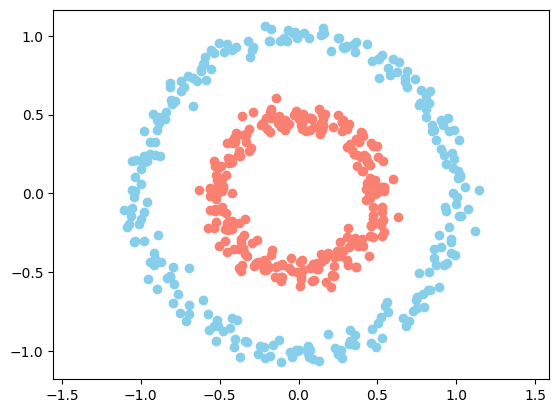

In [29]:
# CREAR EL DATASET

n = 500
p = 2

X, Y = make_circles(n_samples=n, factor=0.5, noise=0.05)

# plt.scatter(X[:, 0], X[:, 1])
plt.scatter(X[Y==0, 0], X[Y==0, 1], c="skyblue")
plt.scatter(X[Y==1, 0], X[Y==1, 1], c="salmon")
plt.axis("equal")

plt.show()

In [17]:
# CLASE DE LA CAPA DE LA RED

class neural_layer():
  def __init__(self, n_conn, n_neur, act_f):
    self.act_f = act_f
    self.b = np.random.rand(1, n_neur) * 2 - 1
    self.W = np.random.rand(n_conn, n_neur) * 2 - 1


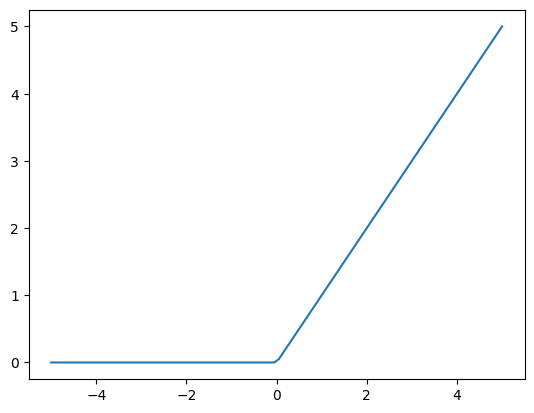

In [9]:
# FUNCIONES DE ACTIVACION

sigm = (lambda x: 1 / (1+np.e**(-x)), 
        lambda x: x * (1-x))

relu = lambda x: np.maximum(0, x)

_x = np.linspace(-5, 5, 100)
plt.plot(_x, relu(_x))

In [25]:
l0 = neural_layer(p, 4, sigm)
l1 = neural_layer(4, 8, sigm)
#...


def create_nn(topology, act_f):

  nn = []

  for l, n_neur in enumerate(topology[:-1]):
    nn.append(neural_layer(n_neur, topology[l+1], act_f))

  return nn


In [53]:
# ENTRENAMIENTO

topology = [p, 4, 8, 16, 8, 4, 1]
neural_net = create_nn(topology, sigm)

l2_cost = (lambda Yp, Yr: np.mean((Yp - Yr)**2), 
           lambda Yp, Yr: (Yp, Yr))

def train(neural_net, X, Y, l2_cost, lr=0.5, train=True):
  
  out = [(None, X)]

  # Forward pass
  for l, layer in enumerate(neural_net):
    z = out[-1][1] @ layer.W + layer.b
    a = layer.act_f[0](z)

    out.append((z, a))

  print(l2_cost[0](out[-1][1], Y))

  if train:

    # Backward pass
    deltas = []

    for l in reversed(range(len(neural_net))):

      z = out[l+1][0]
      a = out[l+1][1]

      # print(a.shape)

      if l == len(neural_net) - 1:
        # Calcular delta ultima capa
        deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))
        pass
      # else:
        # Calcular delta respecto a capa previa
        # pass

    # Gradient descent


train(neural_net, X, Y, l2_cost)



0.25323734335816356


<ipython-input-53-29c962d1ae86>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  deltas.insert(0, l2_cost[1](a, Y) * neural_net[l].act_f[1](a))


ValueError: ignored